<a href="https://colab.research.google.com/github/giaranjan/arch_styles_classifier/blob/main/arch_styles_classifier(pytorch_version).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Next Steps:
# 1. Make the model faster?
# 2. Save the model as pikl once it reaches good accuracy
# 3. Slider for live hyperpara tunings and seeing results
# 4. Hyperpara tuning
# 5. that lr code and graph for determining the best learning rate. + similar codes for other hyperparas?

In [ ]:
# NOTE: USE THE trained_model.pth IF YOU DONT WANT TO RETRAIN THE MODEL FROM
# SCRATCH IN THIS CODE (DUE TO TIME CONSTRAINTS) - you can access it here:

# https://drive.google.com/file/d/185MBi7-191hjfgGn6s6VOhU1flumWga8/view?usp=sharing

In [1]:
import os
import torch
from torchvision import datasets, transforms
from pathlib import Path

In [ ]:
# Step 1: Input Kaggle Credentials

kaggle_username = input("Enter your Kaggle username: ")
kaggle_key = input("Enter your Kaggle API key: ")

# Setting up the environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_username
os.environ['KAGGLE_KEY'] = kaggle_key

In [3]:
# Step 2: Download and Unzip the Dataset

!kaggle datasets download -d dumitrux/architectural-styles-dataset
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: g-images-dataset/Achaemenid architecture/000553.jpg  
  inflating: g-images-dataset/Achaemenid architecture/000554.jpg  
  inflating: g-images-dataset/Achaemenid architecture/000555.jpg  
  inflating: g-images-dataset/American Foursquare architecture/000968.jpg  
  inflating: g-images-dataset/American Foursquare architecture/000970.jpg  
  inflating: g-images-dataset/American Foursquare architecture/000973.jpg  
  inflating: g-images-dataset/American Foursquare architecture/000975.jpg  
  inflating: g-images-dataset/American Foursquare architecture/000976.jpg  
  inflating: g-images-dataset/American Foursquare architecture/000977.jpg  
  inflating: g-images-dataset/American Foursquare architecture/000978.jpg  
  inflating: g-images-dataset/American Foursquare architecture/000979.jpg  
  inflating: g-images-dataset/American Foursquare architecture/000980.jpg  
  inflating: g-images-dataset/American Foursquare architecture/0

In [4]:
!ls

architectural-styles-dataset  g-images-dataset	README.txt  sample_data


In [5]:
# JEREMY'S FASTAI VERSION:
# from fastai.vision.all import *

# path = Path('/content/architectural-styles-dataset')
# print(path.ls())

# PYTORCH VERSION:

import os
import torch
from torchvision import datasets, transforms
from pathlib import Path

path = Path('/content/architectural-styles-dataset')
print(list(path.iterdir()))

[PosixPath('/content/architectural-styles-dataset/Queen Anne architecture'), PosixPath('/content/architectural-styles-dataset/Edwardian architecture'), PosixPath('/content/architectural-styles-dataset/Deconstructivism'), PosixPath('/content/architectural-styles-dataset/Georgian architecture'), PosixPath('/content/architectural-styles-dataset/Novelty architecture'), PosixPath('/content/architectural-styles-dataset/American Foursquare architecture'), PosixPath('/content/architectural-styles-dataset/Russian Revival architecture'), PosixPath('/content/architectural-styles-dataset/International style'), PosixPath('/content/architectural-styles-dataset/Postmodern architecture'), PosixPath('/content/architectural-styles-dataset/Beaux-Arts architecture'), PosixPath('/content/architectural-styles-dataset/Gothic architecture'), PosixPath('/content/architectural-styles-dataset/Chicago school architecture'), PosixPath('/content/architectural-styles-dataset/Art Nouveau architecture'), PosixPath('/c

In [6]:
# JEREMY'S FASTAI VERSION:
# # Load image data from the specified path
# # Use 20% of the data for validation
# # Resize images to 224x224 pixels
# # Set batch size to 64

# dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, item_tfms=Resize(224), bs=64)

# PYTORCH VERSION:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor, Resize, Compose
from torch.utils.data import DataLoader, random_split

# Transformations
transform = Compose([
    Resize((224, 224)),
    ToTensor()
])

# Load the entire dataset with transformations
full_dataset = ImageFolder(path, transform=transform)

# Splitting data for training and validation
valid_size = int(0.2 * len(full_dataset))
train_size = len(full_dataset) - valid_size
train_dataset, valid_dataset = random_split(full_dataset, [train_size, valid_size])

# DataLoaders for training and validation
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=False)

# If you ever need a combined "dls" like structure in Fastai:
dls = {'train': train_loader, 'valid': valid_loader}

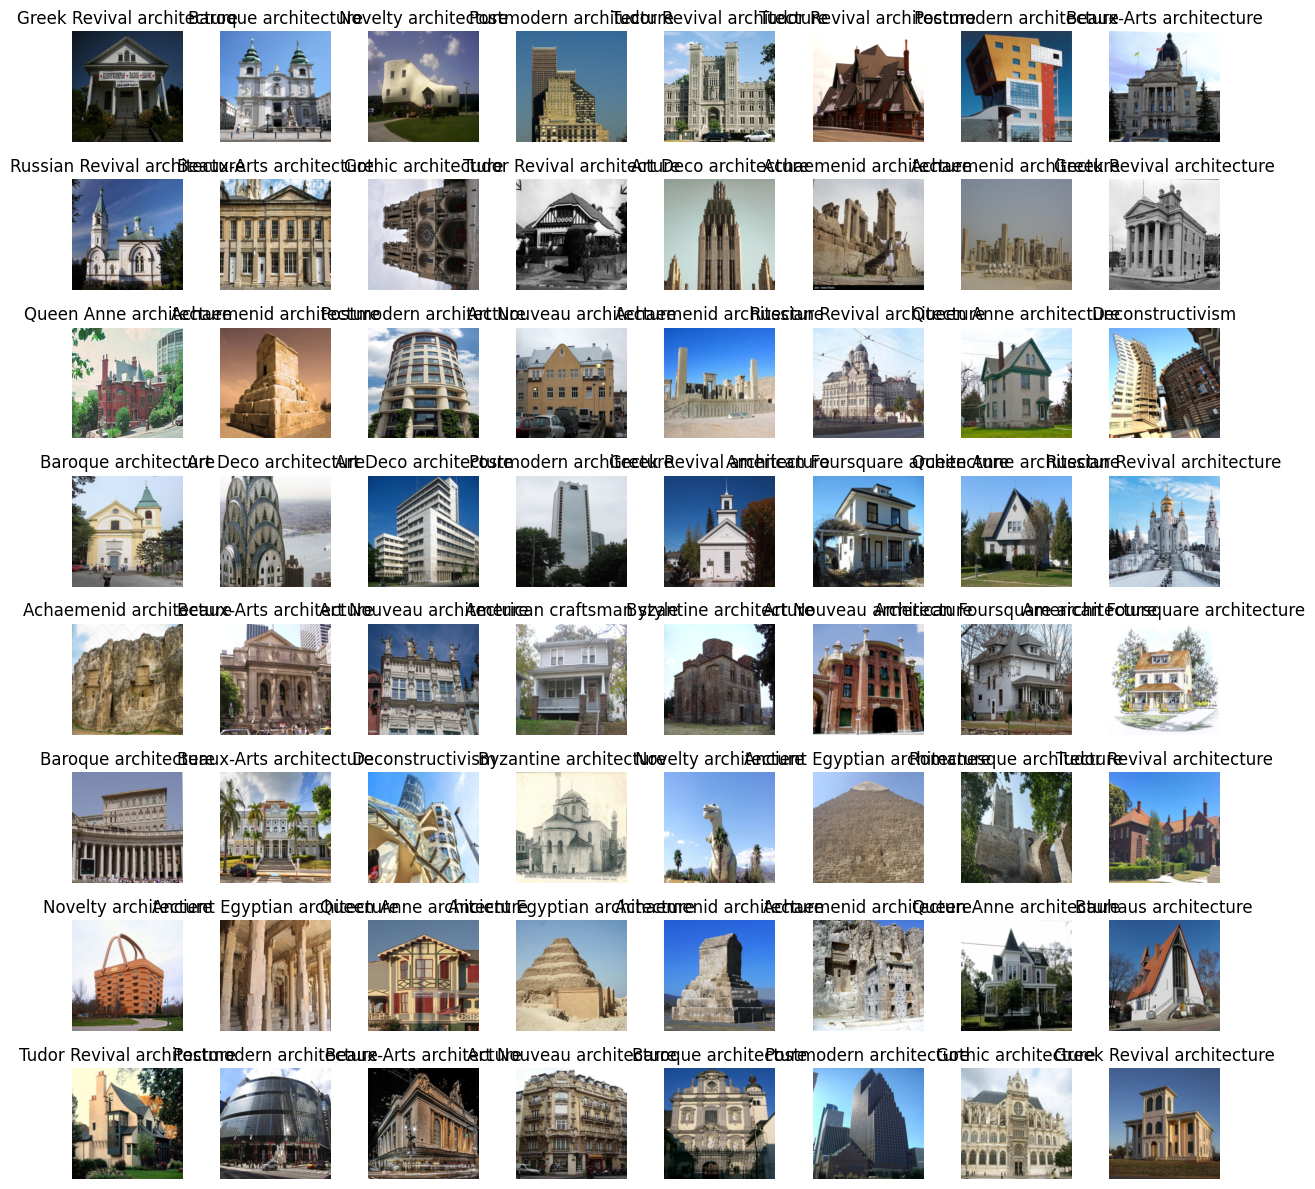

In [8]:
# JEREMY'S FASTAI VERSION:
# # Display a batch of images to check data loading

# dls.show_batch()

# PYTORCH VERSION:
import matplotlib.pyplot as plt
import numpy as np

def show_batch(dl):
    # Get one batch of images
    images, labels = next(iter(dl))

    # Define number of images in a row (square root of batch size or up to 8 for larger batches)
    n_images = int(np.sqrt(images.size(0)))

    fig, axes = plt.subplots(n_images, n_images, figsize=(12, 12))

    for i, ax in enumerate(axes.ravel()):
        if i >= images.size(0):
            ax.axis('off')  # turn off axes for empty subplots
            continue

        # Convert PyTorch tensor to numpy
        img = images[i].numpy().transpose((1, 2, 0))

        # Display the image
        ax.imshow(img)
        ax.set_title(full_dataset.classes[labels[i]])  # Use full_dataset here
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Now, display a batch of images
show_batch(train_loader)


In [11]:
# JEREMY'S FASTAI VERSION:
# # Get all the unique labels from the dataset
# unique_labels = dls.vocab
# print(unique_labels)

# PYTORCH VERSION:
# Get all the unique labels from the dataset
unique_labels = full_dataset.classes
print(unique_labels)

['Achaemenid architecture', 'American Foursquare architecture', 'American craftsman style', 'Ancient Egyptian architecture', 'Art Deco architecture', 'Art Nouveau architecture', 'Baroque architecture', 'Bauhaus architecture', 'Beaux-Arts architecture', 'Byzantine architecture', 'Chicago school architecture', 'Colonial architecture', 'Deconstructivism', 'Edwardian architecture', 'Georgian architecture', 'Gothic architecture', 'Greek Revival architecture', 'International style', 'Novelty architecture', 'Palladian architecture', 'Postmodern architecture', 'Queen Anne architecture', 'Romanesque architecture', 'Russian Revival architecture', 'Tudor Revival architecture']


In [12]:
# JEREMY'S FASTAI VERSION:
# learn = vision_learner(dls, resnet18, metrics=error_rate).to_fp16()
# learn.fine_tune(5)

# PYTORCH VERSION:
# Import necessary modules and choose the architecture:

import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load a pre-trained ResNet-18 model
model = resnet18(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 74.5MB/s]


In [13]:
# Modify the model to fit your dataset's number of classes:

# Modify the last layer to match the number of classes in your dataset
num_classes = len(full_dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)

In [14]:
# Define loss function, optimizer, and move the model to GPU (if available):

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)  # You can adjust the learning rate if necessary
model = model.to(device)

In [15]:
# Training and validation loop:

# First, you'll need a helper function for the training and validation phase of each epoch:

def train_one_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    avg_loss = total_loss / len(train_loader)
    accuracy = 100 * correct / total
    return avg_loss, accuracy

def validate_one_epoch(model, valid_loader, criterion, device):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    avg_loss = total_loss / len(valid_loader)
    accuracy = 100 * correct / total
    return avg_loss, accuracy

In [16]:
# With the helper functions in place, you can now perform the fine-tuning:

n_epochs = 5

for epoch in range(n_epochs):
    train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device)
    valid_loss, valid_acc = validate_one_epoch(model, valid_loader, criterion, device)

    print(f"Epoch {epoch+1}/{n_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_acc:.2f}%")
    print('-' * 50)

Epoch 1/5
Train Loss: 2.4744, Train Acc: 26.70%
Valid Loss: 3.0862, Valid Acc: 19.34%
--------------------------------------------------
Epoch 2/5
Train Loss: 1.8642, Train Acc: 41.07%
Valid Loss: 2.4133, Valid Acc: 31.21%
--------------------------------------------------
Epoch 3/5
Train Loss: 1.6189, Train Acc: 48.57%
Valid Loss: 2.1625, Valid Acc: 38.92%
--------------------------------------------------
Epoch 4/5
Train Loss: 1.4168, Train Acc: 54.75%
Valid Loss: 2.2985, Valid Acc: 31.80%
--------------------------------------------------
Epoch 5/5
Train Loss: 1.2279, Train Acc: 60.17%
Valid Loss: 2.3929, Valid Acc: 35.26%
--------------------------------------------------


In [17]:
from IPython.lib.display import YouTubeVideo
# I want to train some more epochs to see the progress but I dont want to start
# from epoch 0 again as I have already done it above, and it took quite some time.

# Define the starting and ending epoch based on your requirement
start_epoch = 5  # you've already finished 5 epochs, so start with the next one
end_epoch = 9    # to train for another 5 epochs in total

for epoch in range(start_epoch, end_epoch + 1):
    train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device)
    valid_loss, valid_acc = validate_one_epoch(model, valid_loader, criterion, device)

    print(f"Epoch {epoch}/{end_epoch}")
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_acc:.2f}%")
    print('-' * 50)

# start_epoch line is important. And YouTubeVideo need to keep the start_epoch = 5
# line. This line is defining the starting point of the next phase of training. Since
# you've already completed 5 epochs, by setting start_epoch to 5, you're telling
# the loop to begin training from the 5th epoch onwards. 😊🔄

# Without setting the start_epoch, the loop would default to starting from 0 again.
# So, that line ensures you're continuing from where you left off! 👍🔄🚀

Epoch 5/9
Train Loss: 1.0536, Train Acc: 65.47%
Valid Loss: 1.6616, Valid Acc: 50.89%
--------------------------------------------------
Epoch 6/9
Train Loss: 0.8950, Train Acc: 70.46%
Valid Loss: 1.6115, Valid Acc: 51.98%
--------------------------------------------------
Epoch 7/9
Train Loss: 0.6997, Train Acc: 76.50%
Valid Loss: 2.1954, Valid Acc: 46.74%
--------------------------------------------------
Epoch 8/9
Train Loss: 0.5507, Train Acc: 81.49%
Valid Loss: 2.1846, Valid Acc: 47.03%
--------------------------------------------------
Epoch 9/9
Train Loss: 0.4469, Train Acc: 84.67%
Valid Loss: 2.0380, Valid Acc: 51.78%
--------------------------------------------------


In [20]:
# Can i save the model or soemthing - i really dont want to be going through that
# epoch stage again its so long

# Absolutely! Saving your model is crucial to avoid retraining from scratch, especially
# when training sessions are long. Let me guide you through how to save and load
# your model in PyTorch step-by-step. 😄📁

# 1. Saving the Model:
# After your training loops, you can save your trained model using PyTorch's torch.save method.


model_save_path = "trained_model.pth"
torch.save(model.state_dict(), model_save_path)
print(f"Model saved successfully at {model_save_path}")

# This saves the model's parameters (i.e., weights and biases) to the file
# "trained_model.pth"

Model saved successfully at trained_model.pth


In [ ]:
# 2. Loading the Model (for future use):
# When you wish to use your trained model later on (like after closing your
# notebook or another day), you'll need to load the saved parameters back into an
# instance of your model. Here's how you do that:

# Assuming model is already defined with the same architecture
model.load_state_dict(torch.load(model_save_path))
model.to(device)  # ensure you send your model to the desired device after loading
print("Model loaded successfully! 🚀")

# Now, you're good to go and use your loaded model without having to retrain it. Just
# remember that if you make changes to the model architecture, you might face issues
# when loading. Ensure that the architecture is consistent when saving and loading. 😊🔄📂

# So, after your training loop, you can insert the model-saving code to save the
# model's weights. When you come back later, you can skip the training parts, load
# the model using the loading code, and continue with whatever you want to do next! 💡🚀📈

In [ ]:
# After I reload the model, can I make changes on it - like add a few more epochs
# to see how the performacne improves and stuff?

# Absolutely! After reloading the model, you can definitely train it for more epochs
# or make other adjustments to see how the performance evolves. 🚀📈

# Here's a step-by-step breakdown:

# 1. Load the Model:

# # Assuming model is already defined with the same architecture
# model.load_state_dict(torch.load(model_save_path))
# model.to(device)  # ensure you send your model to the desired device after loading
# print("Model loaded successfully! 🚀")


# 2. Continue Training:
# Once the model is loaded, you can simply run your training loop again for however
# many additional epochs you want. Let's say you decide to train for 3 more epochs:

# additional_epochs = 3
# end_epoch += additional_epochs

# for epoch in range(start_epoch, end_epoch + 1):
#     train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device)
#     valid_loss, valid_acc = validate_one_epoch(model, valid_loader, criterion, device)

#     print(f"Epoch {epoch}/{end_epoch}")
#     print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
#     print(f"Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_acc:.2f}%")
#     print('-' * 50)


# 3. Save the Model Again (Optional):
# After training for the additional epochs, you might want to save the updated model:

# torch.save(model.state_dict(), model_save_path)
# print(f"Updated model saved successfully at {model_save_path}! 👌🎉")

# This will overwrite the previously saved model, so if you want to keep both
# versions, you should choose a different save path for the updated model.

# Conclusion:
# So, after loading your model, you're free to make any modifications, train it
# further, evaluate it on different datasets, or anything else you have in mind!
# Just remember to adjust your start_epoch and end_epoch variables accordingly when
# you add more epochs. 😄🔄🔧

In [ ]:
# Can i save the model as pkl?

# Yes, you can save the model as a .pkl (pickle) file in PyTorch. However, there
# are some considerations:

# 🚫⚠️ Security Warning: The pickle module is not safe from arbitrary code execution.
# This means if you load a pickle file from an untrusted source, it may execute
# arbitrary code. Always be careful with pickling and unpickling from unknown sources.

# 📏 Best Practice: It's more common (and safer) to use PyTorch's built-in save and
# load functionalities which save models as .pt or .pth files. But if you have specific
# reasons to use .pkl, you can do so.


In [21]:
# JEREMY'S FASTAI VERSION:

import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

# PYTORCH VERSION ~ STAYS THE EXACT SAME

FileUpload(value={}, description='Upload')

In [27]:
# JEREMY'S FASTAI VERSION:

# def helper():

#     # plotting the image
#     img = PILImage.create(uploader.data[0])
#     img.show()

#     # predicting the image
#     is_style,_,probs = learn.predict(img)

#     print(f"The architecture style is {is_style}")

# PYTORCH VERSION:
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision.transforms import Compose, Resize, ToTensor
from PIL import Image
import io

def helper():

    # Load the image using PIL
    img_pil = Image.open(io.BytesIO(uploader.data[0])).convert("RGB")  # Convert to RGB here

    # Plot the image
    plt.imshow(img_pil)
    plt.axis('off')  # Hide the axis values
    plt.show()

    # Transform and prepare the image for prediction
    transform = Compose([
        Resize((224, 224)),
        ToTensor()
    ])
    img_tensor = transform(img_pil).unsqueeze(0).to(device)  # Add batch dimension and send to device

    # Predict with the PyTorch model
    with torch.no_grad():
        outputs = model(img_tensor)
        probs = F.softmax(outputs, dim=1)
        predicted_class = torch.argmax(probs, dim=1)

    label_name = full_dataset.classes[predicted_class.item()]
    print(f"The architecture style is {label_name}")
    return label_name

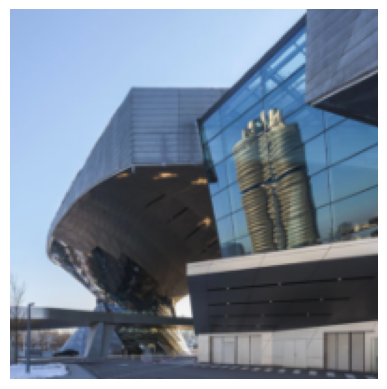

The architecture style is Deconstructivism


In [28]:
# JEREMY'S FASTAI VERSION:
# helper()

# PYTORCH VERSION ~ we have modified this and the above block of code a bit to make
# the predicted name a global variabel that we can use later in the code too

predicted_label = helper()

In [29]:
# Insert the predicted architecture style's name and grab the first para of its
# wiki to give info about that search term. Can help with giving a very short and
# quick introduction about that architecture style to the user.

# Perhaps i can scour the web and get like 3 images of that style from image search too

!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=4e06f3f646c23c10eaabb3a139f44f7daed916132aac994e61734305aafca4c1
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [30]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.4 MB/s eta 0:00:00


In [32]:
import wikipedia
import ipywidgets as widgets
from IPython.display import display

In [33]:
def fetch_first_para(label_name):
    # Create the search query
    query = f"{label_name} architecture style"

    try:
        # Fetching the summary
        summary = wikipedia.summary(query, sentences=5)
        print(summary)

    except wikipedia.exceptions.DisambiguationError as e:
        # Handle cases where there are multiple potential matches
        def on_submit(change):
            # Function to run when an option is selected and submitted
            selected = select_widget.value
            summary = wikipedia.summary(selected, sentences=5)
            print(summary)

        # Create and display the widget for selection
        select_widget = widgets.RadioButtons(options=e.options, description='Choose:')
        submit_button = widgets.Button(description="Submit")
        submit_button.on_click(on_submit)

        display(select_widget, submit_button)

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage:
fetch_first_para(predicted_label)

# Here's a concise step-by-step logic tree for the function: 🌳✨

# 1. Function Objective: Retrieve the first few sentences of a Wikipedia article
# related to a given architectural style.

# 2. Formulate the Search Query: Combine label_name with the term "architecture style"
# for specificity.

# 3. Attempt to Retrieve Summary: Use the formulated query to fetch a concise
# Wikipedia summary.

# 4. Error Handling:

# 4a. Case: Multiple Potential Matches (DisambiguationError):
#   ~ Display options from the conflicting matches to the user.
#   ~ Allow the user to select a specific match.
#   ~ On user's selection and submission: Fetch and display the Wikipedia summary
#     for the chosen match.

# 4b. Case: Other Errors:
#   ~ Catch and display a generic error message.

# 5. End Objective: Display the relevant Wikipedia summary to the user based on
# the input label or user's choice in case of ambiguity.

# This structure provides a clear, high-level overview of the function's behavior
# and logic flow. 👓🌲🚀

Deconstructivism is a postmodern architectural movement which appeared in the 1980s. It gives the impression of the fragmentation of the constructed building, commonly characterised by an absence of obvious harmony, continuity, or symmetry.  Its name is a portmanteau of Constructivism and "Deconstruction", a form of semiotic analysis developed by the French philosopher Jacques Derrida. Architects whose work is often described as deconstructivist (though in many cases the architects themselves reject the label)  include Zaha Hadid, Peter Eisenman, Frank Gehry, Rem Koolhaas, Daniel Libeskind, Bernard Tschumi, and Coop Himmelb(l)au.The term does not inherently refer to the style's deconstructed visuals as the English adjective suggests, but instead derives from the movement's foundations in contrast to the Russian Constructivist movement during the First World War that "broke the rules" of classical architecture through the French language.Besides fragmentation, deconstructivism often man